# Importy

In [44]:
# import libraries
import pandas as pd

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image


In [2]:
with open('article.txt', 'r') as file:
    text = file.read()

# Wywalenie stop-wordow

In [32]:
word_tokens = word_tokenize(text)
stop_words = set(stopwords.words('english'))
stop_words.add(".")
stop_words.add(",")
stop_words.add("-")
stop_words.add("''")
stop_words.add("?")
stop_words.add(":")
stop_words.add(";")
stop_words.add("'s")
stop_words.add('``')
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
print(word_tokens)
print(len(word_tokens))
print(filtered_sentence)
print(len(filtered_sentence))

['After', 'a', 'heartbreaking', 'defeat', 'by', 'Inter', 'Milan', 'in', 'the', 'Champions', 'League', 'semi-finals', ',', 'there', 'was', 'a', 'very', 'real', 'possibility', 'of', 'Barcelona', "'s", 'season', 'falling', 'apart', '.', 'In', 'recent', 'seasons', ',', 'perhaps', 'it', 'would', '.', 'Downgrading', 'a', 'potential', 'treble', 'to', 'a', 'solitary', 'cup', 'triumph', 'would', 'have', 'been', 'on', 'brand', 'not', 'so', 'long', 'ago', ',', 'given', 'the', 'club', "'s", 'struggles', 'on', 'and', 'off', 'the', 'pitch', 'in', 'recent', 'years', '.', 'But', 'this', 'is', 'a', 'new', 'Barcelona', '.', 'After', 'falling', '2-0', 'behind', 'in', 'Sunday', "'s", 'Clasico', 'against', 'arch-rivals', 'Real', 'Madrid', '-', 'the', 'third', 'time', 'in', 'four', 'matches', 'they', 'have', 'done', 'that', '-', 'Barcelona', 'roared', 'back', 'to', 'lead', '4-2', 'at', 'half-time', ',', '4-3', 'by', 'the', 'end', '.', 'After', 'surviving', 'some', 'late', 'Madrid', 'pressure', ',', 'Barcelo

# Lematyzacja

In [33]:
lemmatizer = WordNetLemmatizer()
lemmatized_sentence = [lemmatizer.lemmatize(w) for w in filtered_sentence]
print(lemmatized_sentence)


['heartbreaking', 'defeat', 'Inter', 'Milan', 'Champions', 'League', 'semi-finals', 'real', 'possibility', 'Barcelona', 'season', 'falling', 'apart', 'recent', 'season', 'perhaps', 'would', 'Downgrading', 'potential', 'treble', 'solitary', 'cup', 'triumph', 'would', 'brand', 'long', 'ago', 'given', 'club', 'struggle', 'pitch', 'recent', 'year', 'new', 'Barcelona', 'falling', '2-0', 'behind', 'Sunday', 'Clasico', 'arch-rivals', 'Real', 'Madrid', 'third', 'time', 'four', 'match', 'done', 'Barcelona', 'roared', 'back', 'lead', '4-2', 'half-time', '4-3', 'end', 'surviving', 'late', 'Madrid', 'pressure', 'Barcelona', 'know', 'victory', 'Espanyol', 'Thursday', 'secure', '28th', 'league', 'crown', 'Defeat', 'Madrid', 'Mallorca', 'Wednesday', 'would', 'job', 'Four', 'Clasico', 'victory', 'season', 'second', 'time', 'ever', 'happened', 'highlight', 'marvelous', 'job', 'Hansi', 'Flick', 'done', 'since', 'replacing', 'Xavi', 'manager', 'last', 'summer', 'team', 'long', 'ago', 'lacked', 'identity'

# Najczestsze wystapienia

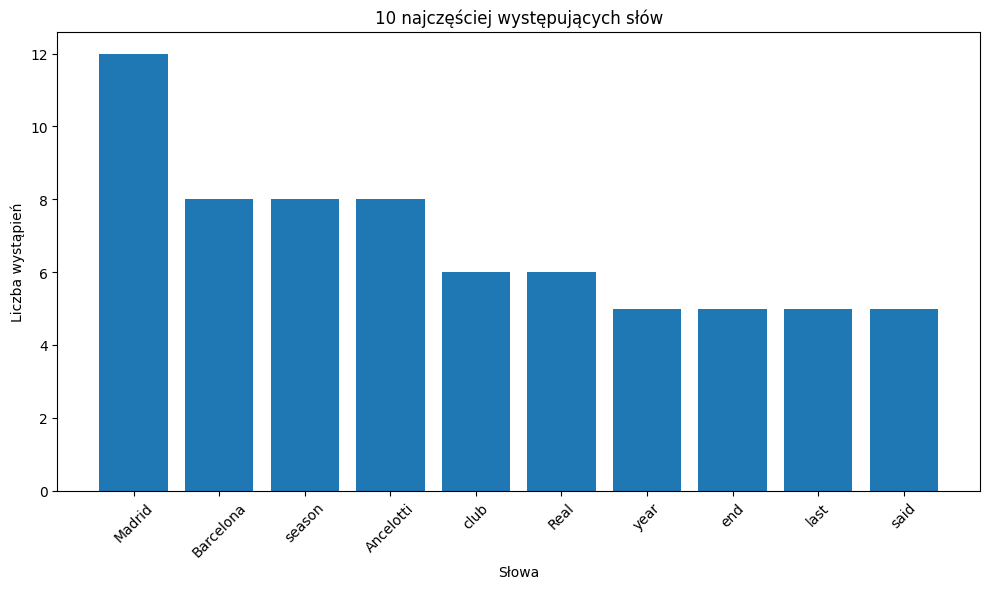

In [37]:
fd = nltk.FreqDist(lemmatized_sentence)
# fd.most_common(3)
# [('must', 1568), ('people', 1291), ('world', 1128)]
# fd.tabulate(10)
#   must people  world
#   1568   1291   1128
top_words = fd.most_common(10)
words, counts = zip(*top_words)

# 2. Wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('Słowa')
plt.ylabel('Liczba wystąpień')
plt.title('10 najczęściej występujących słów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Word Cloud

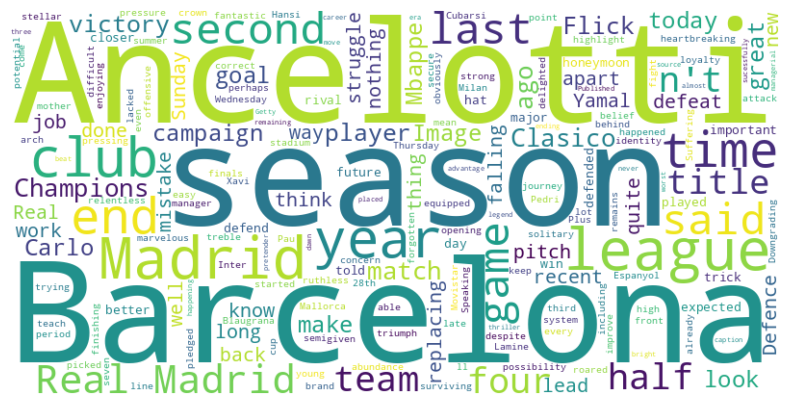

In [49]:
text = ' '.join(lemmatized_sentence)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
